In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# Known Values for Calibration

distance_between_cameras_inches = 2.75

depth_from_left_camera_inches = 8
depth_from_right_camera_inches = 8

distance_x_from_right_camera_inches = -1.5 # point was to the left of the camera
distance_x_from_left_camera_inches = 1.5 # point was to the right of the camera

distance_y_from_left_camera_inches = -0.625 + 3.5 # original point plus 3.5 inches to use top corner as corner detector didn't like the original point i wanted
distance_y_from_right_camera_inches = -0.625 + 3.5

In [9]:
def capture_images():
    cap1 = cv2.VideoCapture(0)
    cap2 = cv2.VideoCapture(1)

    images = []
    for i in range(2):
        cv2.waitKey(2500)
        ret1, frame1 = cap1.read()
        ret2, frame2 = cap2.read()

        if ret1:
            frame_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
            images.append(frame_rgb)
            cv2.imshow('Capture Image Camera 1', frame1)
        else:
            print("Failed to capture image")

        if ret2:
            frame_rgb = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
            images.append(frame_rgb)
            cv2.imshow('Capture Image Camera 2', frame2)
        else:
            print("Failed to capture image")

    print(images)

    cap1.release()
    cap2.release()
    cv2.destroyAllWindows()

    # # Display captured images
    # fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    # for i, img in enumerate(images):
    #     axs[i].imshow(img)
    #     axs[i].set_title(f'Image {i+1}')
    # plt.show()

    return images

# Capture images
images = capture_images()

[array([[[132, 150, 166],
        [132, 150, 166],
        [132, 148, 165],
        ...,
        [175, 177, 177],
        [169, 172, 171],
        [167, 169, 168]],

       [[132, 150, 166],
        [132, 150, 166],
        [131, 148, 165],
        ...,
        [177, 180, 179],
        [174, 176, 175],
        [171, 174, 173]],

       [[132, 150, 166],
        [132, 150, 166],
        [132, 148, 165],
        ...,
        [171, 174, 173],
        [170, 173, 172],
        [170, 173, 172]],

       ...,

       [[206, 202, 185],
        [206, 202, 185],
        [207, 202, 184],
        ...,
        [232, 206, 158],
        [232, 206, 159],
        [232, 206, 160]],

       [[207, 203, 186],
        [206, 202, 185],
        [208, 202, 183],
        ...,
        [230, 204, 155],
        [230, 203, 157],
        [230, 203, 157]],

       [[207, 203, 186],
        [207, 203, 186],
        [207, 202, 184],
        ...,
        [231, 205, 157],
        [231, 205, 158],
        [231, 204, 159]

In [25]:
right_image = images[0]
left_image = images[1]

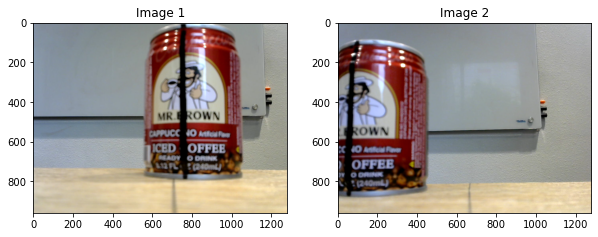

In [27]:
image_list = [right_image, left_image]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, img in enumerate(image_list):
    axs[i].imshow(img)
    axs[i].set_title(f'Image {i+1}')
plt.show()

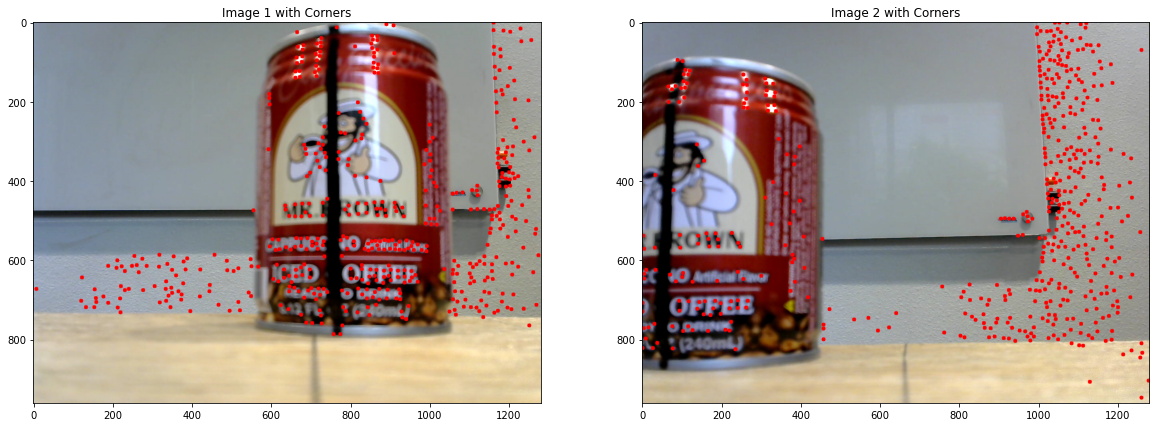

In [36]:
def detect_corners(images):
    corner_images = []
    all_corners = []
    for img in images:
        img_copy = img.copy()
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        corners = cv2.goodFeaturesToTrack(gray, maxCorners=500, qualityLevel=0.01, minDistance=10)
        corners = np.int0(corners)

        img_corners = []
        for i in corners:
            x, y = i.ravel()
            cv2.circle(img_copy, (x, y), radius=5, color=(255, 0, 0), thickness=-1)
            img_corners.append((x, y))

        corner_images.append(img_copy)
        all_corners.append(img_corners)
    return corner_images, all_corners

corner_images, all_corners = detect_corners(image_list)

plt.figure(figsize=(20, 10))
for i, img in enumerate(corner_images):
    plt.subplot(1, 2, i+1)
    plt.imshow(img)
    plt.title(f'Image {i+1} with Corners')
plt.show()

In [45]:
# Matched Corner through Visual Inspection

# print([corner for corner in all_corners[0] if corner[0] < 780 and corner[1] < 50])
# print([corner for corner in all_corners[1] if corner[0] < 120 and corner[1] < 100])

corner_right_camera = (765, 13)
corner_left_camera = (102, 98)

In [48]:
corners_right_camera = [corner for corner in all_corners[0]]
corners_left_camera = [corner for corner in all_corners[1]]

# Save as numpy files
np.save('corner_right_camera.npy', corner_right_camera)
np.save('corner_left_camera.npy', corner_left_camera)

corner_right_camera
corners_left_camera

[(925, 495),
 (936, 495),
 (1051, 460),
 (1051, 436),
 (914, 494),
 (969, 478),
 (1025, 466),
 (106, 190),
 (1042, 404),
 (1034, 445),
 (330, 155),
 (1022, 432),
 (89, 95),
 (257, 204),
 (959, 536),
 (1050, 478),
 (66, 162),
 (904, 495),
 (93, 201),
 (1006, 185),
 (108, 165),
 (84, 161),
 (1020, 396),
 (113, 154),
 (995, 13),
 (972, 502),
 (105, 131),
 (333, 187),
 (310, 142),
 (116, 132),
 (1032, 455),
 (241, 701),
 (1015, 544),
 (337, 224),
 (1020, 408),
 (255, 647),
 (1001, 544),
 (185, 532),
 (262, 719),
 (162, 532),
 (317, 209),
 (120, 122),
 (1001, 112),
 (1010, 257),
 (1136, 74),
 (96, 568),
 (1037, 394),
 (1001, 98),
 (266, 216),
 (184, 702),
 (1063, 265),
 (179, 721),
 (1050, 425),
 (220, 721),
 (314, 172),
 (999, 62),
 (1101, 291),
 (116, 766),
 (1015, 330),
 (109, 120),
 (247, 566),
 (262, 193),
 (224, 703),
 (971, 489),
 (1024, 197),
 (5, 571),
 (139, 722),
 (241, 720),
 (254, 157),
 (101, 642),
 (169, 565),
 (1013, 216),
 (330, 403),
 (266, 702),
 (1025, 72),
 (5, 646),
 (

In [46]:
# Save image right and image left
cv2.imwrite('right_camera.jpg', right_image)
cv2.imwrite('left_camera.jpg', left_image)

True

In [ ]:
distance_between_cameras_inches = 2.75

depth_from_left_camera_inches = 8
depth_from_right_camera_inches = 8

distance_x_from_right_camera_inches = -1.5 # point was to the left of the camera
distance_x_from_left_camera_inches = 1.5 # point was to the right of the camera

distance_y_from_left_camera_inches = -0.625 + 3.5 # original point plus 3.5 inches to use top corner as corner detector didn't like the original point i wanted
distance_y_from_right_camera_inches = -0.625 + 3.5

matched_corner_3d_location_right_camera_in_inches = (distance_x_from_right_camera_inches, distance_y_from_right_camera_inches, depth_from_right_camera_inches)
matched_corner_3d_location_left_camera_in_inches = (distance_x_from_left_camera_inches, distance_y_from_left_camera_inches, depth_from_left_camera_inches)

matched_corner_right_camera_pixel_location = (765, 13)
matched_corner_left_camera_pixel_location = (102, 98)